In [1]:
#importing necessary librarry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("bengaluru_house_prices.csv") #reading csv file

In [3]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Cleaning

In [4]:
df1.groupby('area_type')['area_type'].agg('count') #checking types avaiable in area_type

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#Drop unnessary column --> availability , area_type , balcony , society

In [6]:
df2=df1.drop(["society","balcony","area_type","availability"],axis='columns')

In [7]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
#Checking values which are null

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
#We will drop na values as this are small as compare to our dataset size

In [11]:
df3=df2.dropna()

In [12]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [14]:
df3['size'].nunique()

31

In [15]:
df1.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [16]:
#AS so much randomness in this size column so we will create a new column bhk

In [17]:
#We will take string given and split with space and take 1st one which represent size , but that it is also string
#so convert to int

In [18]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split()[0]))

<ipython-input-18-3f24ffd2339c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split()[0]))


In [19]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [20]:
df3['bhk'].nunique()

19

In [21]:
df3.total_sqft.nunique()

2067

In [22]:
df3.groupby('total_sqft')['total_sqft'].agg('count')

total_sqft
1                1
1.25Acres        1
1.26Acres        1
1000           172
1000 - 1285      1
              ... 
995             10
996              4
997              2
998              1
999              3
Name: total_sqft, Length: 2067, dtype: int64

In [23]:
#We can see in datatypes some range are available --> 1000-1285

In [24]:
#For that we will make a function which will try convert all area to square feet and when it is not possible (like in range)
#There it will return error

In [25]:
def is_float(x):
    
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df3[df3['total_sqft'].apply(is_float)] #Will print what are suitable data types

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [27]:
#For getting disturbance or where function returned false use ~

In [28]:
df3[~df3['total_sqft'].apply(is_float)].sample(10)

,location,size,total_sqft,bath,price,bhk
12955,Thanisandra,3 BHK,1437 - 1629,3.0,75.885,3
6643,Whitefield,4 BHK,2830 - 2882,5.0,157.500,4
2587,Tumkur Road,1 BHK,596 - 804,1.0,30.090,1
2916,Thanisandra,2 BHK,934 - 1437,2.0,58.680,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
1694,JP Nagar,4 BHK,4000 - 5249,4.0,314.500,4
5983,Bannerghatta Road,2 BHK,1255 - 1350,2.0,67.730,2
11285,Whitefield,3 BHK,1235 - 1410,3.0,40.985,3
12544,Hebbal,4 BHK,4000 - 4450,6.0,359.000,4
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2


In [29]:
#So in above data we can see we have data likes 15Acres

In [30]:
#whenevr range will come we will take average otherwise we will discard other points, as unit is also different 

In [31]:
def convert_sqft_to_num(x):
    tokens=x.split('-') # 2551-5636
    if len(tokens)==2:
        mean=(float(tokens[0])+float(tokens[1]))/2
        return mean
    try:
        return float(x)
    except:
        return None

In [32]:
#Testing our function before applying

In [33]:
convert_sqft_to_num("25669")

25669.0

In [34]:
convert_sqft_to_num("250-850")

550.0

In [35]:
convert_sqft_to_num("25669Acres")

In [36]:
df4=df3.copy()

In [37]:
df4['total_sqft']=df4['total_sqft'].apply(lambda x: convert_sqft_to_num(x))

In [38]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


# Feature Engineering

In [39]:
df5=df4.copy()

In [40]:
df5['price_per_sqft']=(df5['price']*100000)/df5['total_sqft']

In [41]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [42]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [43]:
df5.location.nunique()

1304

We have 1304 types of location so sligtly difficult to apply OneHotEncoding 

We will reduce it by introducing a category others

In [44]:
#Before that we will apply stripping so it will remove any leading space or any space at end

In [45]:
df5.location=df5['location'].apply(lambda x:x.strip())

In [46]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [47]:
location_stats=df5.groupby('location')['location'].agg('count')

In [48]:
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [49]:
location_stats=location_stats.sort_values(ascending=False)

In [50]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [51]:
#We set threshold like any location having less then 10 data points are called other location

In [52]:
len(location_stats[location_stats<=10])

1052

In [53]:
location_stats_less_then_10=location_stats[location_stats<=10]

In [54]:
location_stats_less_then_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [55]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_less_then_10 else x)

In [56]:
df5.location.nunique()

242

Now we have 242 location so slightly better to apply OneHotEncoding

# Outlier Detection

We will consider a typical bed room has area > 300 sqft , so we will remove that points where area of a room is less then 300 sqft

In [57]:
df5[(df5.total_sqft/df5.bhk)<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [58]:
df6=df5[~((df5.total_sqft/df5.bhk)<300)]

In [59]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [60]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

We will filter data where pice per sqft is either very low or very high

we will filter data beyound mean-1standard devation and mean+1standard devatiation

In [61]:
 for key,subdf in df6.groupby('location'):
        print(key)

1st Block Jayanagar
1st Phase JP Nagar
2nd Phase Judicial Layout
2nd Stage Nagarbhavi
5th Block Hbr Layout
5th Phase JP Nagar
6th Phase JP Nagar
7th Phase JP Nagar
8th Phase JP Nagar
9th Phase JP Nagar
AECS Layout
Abbigere
Akshaya Nagar
Ambalipura
Ambedkar Nagar
Amruthahalli
Anandapura
Ananth Nagar
Anekal
Anjanapura
Ardendale
Arekere
Attibele
BEML Layout
BTM 2nd Stage
BTM Layout
Babusapalaya
Badavala Nagar
Balagere
Banashankari
Banashankari Stage II
Banashankari Stage III
Banashankari Stage V
Banashankari Stage VI
Banaswadi
Banjara Layout
Bannerghatta
Bannerghatta Road
Basavangudi
Basaveshwara Nagar
Battarahalli
Begur
Begur Road
Bellandur
Benson Town
Bharathi Nagar
Bhoganhalli
Billekahalli
Binny Pete
Bisuvanahalli
Bommanahalli
Bommasandra
Bommasandra Industrial Area
Bommenahalli
Brookefield
Budigere
CV Raman Nagar
Chamrajpet
Chandapura
Channasandra
Chikka Tirupathi
Chikkabanavar
Chikkalasandra
Choodasandra
Cooke Town
Cox Town
Cunningham Road
Dasanapura
Dasarahalli
Devanahalli
Devarachi

In [62]:
 for key,subdf in df6.groupby('location'):
        print(subdf)

                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383     15018.181818  
85

13090  Anandapura      3 BHK      1576.0   3.0  58.70    3     3724.619289
           location       size  total_sqft  bath  price  bhk  price_per_sqft
1082   Ananth Nagar      1 BHK       500.0   1.0  14.00    1     2800.000000
1508   Ananth Nagar      2 BHK      1100.0   2.0  31.50    2     2863.636364
1663   Ananth Nagar      2 BHK       982.0   2.0  24.55    2     2500.000000
2001   Ananth Nagar      1 BHK       500.0   2.0  14.00    1     2800.000000
2092   Ananth Nagar      2 BHK      1109.0   2.0  60.00    2     5410.279531
3334   Ananth Nagar      3 BHK      1200.0   2.0  65.00    3     5416.666667
3576   Ananth Nagar      2 BHK       900.0   2.0  22.50    2     2500.000000
3946   Ananth Nagar      2 BHK       908.0   2.0  26.00    2     2863.436123
4740   Ananth Nagar      2 BHK       870.0   2.0  36.00    2     4137.931034
5665   Ananth Nagar      2 BHK       937.0   2.0  35.00    2     3735.325507
6401   Ananth Nagar  4 Bedroom      1200.0   3.0  87.00    4     7250.000000
7

12712  BTM 2nd Stage      3 BHK      2500.0   3.0  345.0    3    13800.000000
         location       size  total_sqft  bath   price  bhk  price_per_sqft
1916   BTM Layout      2 BHK      1150.0   2.0   63.00    2     5478.260870
2209   BTM Layout  3 Bedroom      3000.0   3.0  338.00    3    11266.666667
4113   BTM Layout      3 BHK         NaN   3.0   10.00    3             NaN
4440   BTM Layout  6 Bedroom      3300.0   6.0  165.00    6     5000.000000
5317   BTM Layout      3 BHK      1450.0   2.0   81.00    3     5586.206897
6041   BTM Layout      3 BHK      1776.0   2.0   75.00    3     4222.972973
6210   BTM Layout      3 BHK      1458.0   3.0   79.00    3     5418.381344
6317   BTM Layout      2 BHK       935.0   2.0   51.50    2     5508.021390
6529   BTM Layout      2 BHK      1020.0   2.0   46.50    2     4558.823529
6821   BTM Layout      3 BHK      1600.0   3.0  112.00    3     7000.000000
7532   BTM Layout      3 BHK      1300.0   2.0   75.00    3     5769.230769
7987   BTM

          location   size  total_sqft  bath   price  bhk  price_per_sqft
51     Bhoganhalli  3 BHK      1670.0   3.0   99.00    3     5928.143713
811    Bhoganhalli  4 BHK      2119.0   4.0  111.00    4     5238.319962
1427   Bhoganhalli  3 BHK      1410.0   3.0   65.00    3     4609.929078
1499   Bhoganhalli  2 BHK       804.1   2.0   69.09    2     8592.214899
1970   Bhoganhalli  3 BHK      1718.0   3.0   90.20    3     5250.291036
2465   Bhoganhalli  2 BHK      1444.0   2.0   75.97    2     5261.080332
2571   Bhoganhalli  2 BHK      1447.0   2.0   75.97    2     5250.172771
2824   Bhoganhalli  3 BHK      1700.0   3.0  126.00    3     7411.764706
3424   Bhoganhalli  4 BHK      1451.5   4.0  121.00    4     8336.203927
3671   Bhoganhalli  2 BHK      1447.0   2.0   75.97    2     5250.172771
4288   Bhoganhalli  3 BHK      1053.4   3.0   88.91    3     8440.288589
4620   Bhoganhalli  2 BHK       910.2   2.0   80.64    2     8859.591299
4986   Bhoganhalli  3 BHK      1610.0   3.0   84.53

           location       size  total_sqft  bath   price  bhk  price_per_sqft
64     Bommanahalli  8 Bedroom      3000.0   8.0  140.00    8     4666.666667
1326   Bommanahalli      2 BHK      1200.0   2.0   40.00    2     3333.333333
1346   Bommanahalli      3 BHK      1730.0   3.0   96.00    3     5549.132948
1608   Bommanahalli      1 BHK       520.0   1.0   19.50    1     3750.000000
2188   Bommanahalli      2 BHK      1000.0   2.0   29.90    2     2990.000000
2280   Bommanahalli      1 BHK       515.0   1.0   25.00    1     4854.368932
2771   Bommanahalli      2 BHK      1090.0   3.0   44.00    2     4036.697248
3089   Bommanahalli      3 BHK      1250.0   2.0   42.50    3     3400.000000
3632   Bommanahalli      3 BHK      1375.0   3.0   59.00    3     4290.909091
4094   Bommanahalli      3 BHK      1250.0   3.0   55.00    3     4400.000000
4353   Bommanahalli      2 BHK      1110.0   2.0   33.00    2     2972.972973
4993   Bommanahalli      3 BHK      1850.0   3.0   90.00    3   

13204  Dasanapura      2 BHK       814.0   2.0   43.70    2     5368.550369
          location       size  total_sqft  bath   price  bhk  price_per_sqft
215    Dasarahalli      2 BHK      1295.0   2.0   65.00    2     5019.305019
1151   Dasarahalli      3 BHK      1520.0   2.0   75.00    3     4934.210526
1479   Dasarahalli      2 BHK      1300.0   2.0   55.00    2     4230.769231
2261   Dasarahalli      3 BHK      1901.0   3.0  119.00    3     6259.863230
4104   Dasarahalli      2 BHK      1150.0   2.0   70.00    2     6086.956522
4340   Dasarahalli  7 Bedroom      2400.0   3.0  150.00    7     6250.000000
5065   Dasarahalli      3 BHK      2100.0   3.0  120.00    3     5714.285714
5986   Dasarahalli      2 BHK      1300.0   2.0   50.00    2     3846.153846
6562   Dasarahalli  3 Bedroom      2400.0   2.0  152.00    3     6333.333333
7514   Dasarahalli      2 BHK      1220.0   2.0   52.00    2     4262.295082
7815   Dasarahalli      2 BHK      1375.0   2.0   60.00    2     4363.636364


               location   size  total_sqft  bath   price  bhk  price_per_sqft
1194   Doddakallasandra  2 BHK      1233.0   2.0   43.00    2     3487.429035
1547   Doddakallasandra  2 BHK      1010.0   2.0   40.39    2     3999.009901
1915   Doddakallasandra  3 BHK      1360.0   2.0   54.39    3     3999.264706
2424   Doddakallasandra  3 BHK      1460.0   2.0   58.39    3     3999.315068
4987   Doddakallasandra  3 BHK      2493.0   3.0  115.00    3     4612.916165
5327   Doddakallasandra  3 BHK      2493.0   3.0  115.00    3     4612.916165
5636   Doddakallasandra  3 BHK      1360.0   2.0   54.40    3     4000.000000
6008   Doddakallasandra  3 BHK      1425.0   2.0   56.99    3     3999.298246
6077   Doddakallasandra  2 BHK      1010.0   2.0   40.39    2     3999.009901
8918   Doddakallasandra  2 BHK      1072.0   2.0   42.87    2     3999.067164
9055   Doddakallasandra  2 BHK      1010.0   2.0   40.40    2     4000.000000
11087  Doddakallasandra  2 BHK      1010.0   2.0   41.00    2   

13287  Gubbalala      2 BHK      1285.0   2.0   90.00    2     7003.891051
      location       size  total_sqft  bath   price  bhk  price_per_sqft
66      Gunjur      2 BHK      1140.0   2.0   43.00    2     3771.929825
890     Gunjur      3 BHK      1356.0   2.0   66.00    3     4867.256637
1708    Gunjur      3 BHK      1600.0   3.0   75.00    3     4687.500000
3121    Gunjur  4 Bedroom      2000.0   3.0   95.00    4     4750.000000
3173    Gunjur      2 BHK      1140.0   2.0   49.11    2     4307.894737
3856    Gunjur      2 BHK      1195.0   2.0   44.00    2     3682.008368
4383    Gunjur      2 BHK      1190.0   2.0   40.00    2     3361.344538
4816    Gunjur      2 BHK      1457.0   2.0   60.00    2     4118.050789
5181    Gunjur  5 Bedroom      6613.0   7.0  950.00    5    14365.643430
5452    Gunjur      2 BHK      1080.0   2.0   41.00    2     3796.296296
7034    Gunjur      3 BHK      2132.0   3.0   80.00    3     3752.345216
7469    Gunjur      3 BHK      1800.0   3.0   70.

[83 rows x 7 columns]
             location       size  total_sqft  bath   price  bhk  \
255    Horamavu Agara  4 Bedroom     1200.00   2.0   95.00    4   
658    Horamavu Agara      2 BHK     1200.00   2.0   45.00    2   
1054   Horamavu Agara      3 BHK     1560.00   3.0   75.00    3   
1185   Horamavu Agara      3 BHK     1453.00   2.0   46.48    3   
1406   Horamavu Agara      2 BHK      755.00   2.0   37.49    2   
1422   Horamavu Agara      2 BHK      982.00   2.0   47.65    2   
1651   Horamavu Agara      3 BHK     1650.00   2.0   75.00    3   
1803   Horamavu Agara      2 BHK      950.00   2.0   39.00    2   
2149   Horamavu Agara      2 BHK     1170.00   2.0   38.00    2   
2685   Horamavu Agara      3 BHK     1756.00   3.0   92.00    3   
3774   Horamavu Agara      2 BHK     1106.00   2.0   43.09    2   
3922   Horamavu Agara      2 BHK     1079.00   2.0   41.00    2   
4811   Horamavu Agara      2 BHK     1169.00   2.0   64.00    2   
5281   Horamavu Agara      3 BHK     126

[65 rows x 7 columns]
      location   size  total_sqft  bath   price  bhk  price_per_sqft
295     Jakkur  2 BHK     1417.00   2.0   75.00    2     5292.872265
524     Jakkur  4 BHK     5230.00   6.0  465.00    4     8891.013384
726     Jakkur  3 BHK     1590.00   2.0  125.00    3     7861.635220
752     Jakkur  2 BHK     1279.00   2.0   77.00    2     6020.328382
920     Jakkur  3 BHK     1710.00   3.0  107.00    3     6257.309942
...        ...    ...         ...   ...     ...  ...             ...
12518   Jakkur  2 BHK     1432.00   2.0   85.00    2     5935.754190
12661   Jakkur  3 BHK     1150.00   3.0   65.00    3     5652.173913
12843   Jakkur  3 BHK     1932.47   3.0  183.00    3     9469.745973
12949   Jakkur  3 BHK     1710.00   3.0  110.00    3     6432.748538
13201   Jakkur  2 BHK     1125.00   2.0   44.75    2     3977.777778

[68 rows x 7 columns]
        location       size  total_sqft  bath    price  bhk  price_per_sqft
379    Jalahalli      3 BHK      1400.0   3.0   77.

          location       size  total_sqft  bath  price  bhk  price_per_sqft
211    Kammasandra      3 BHK      1595.0   3.0  65.00    3     4075.235110
708    Kammasandra      2 BHK       810.0   2.0  24.50    2     3024.691358
780    Kammasandra      2 BHK       674.0   2.0  33.00    2     4896.142433
959    Kammasandra      1 BHK       657.5   1.0  18.41    1     2800.000000
1463   Kammasandra      2 BHK       674.0   2.0  29.00    2     4302.670623
1742   Kammasandra      3 BHK       912.0   2.0  39.00    3     4276.315789
2027   Kammasandra      2 BHK      1156.0   2.0  32.00    2     2768.166090
2235   Kammasandra      2 BHK       870.0   2.0  24.00    2     2758.620690
2244   Kammasandra  2 Bedroom      1200.0   2.0  66.00    2     5500.000000
2420   Kammasandra      2 BHK      1018.0   2.0  23.45    2     2303.536346
2585   Kammasandra      2 BHK       990.0   2.0  31.50    2     3181.818182
3837   Kammasandra      3 BHK      1385.0   2.0  34.63    3     2500.361011
4252   Kamma

13142  Kathriguppe      3 BHK      1350.0   3.0   80.99    3     5999.259259
               location       size  total_sqft  bath  price  bhk  \
328    Kaval Byrasandra      2 BHK      1200.0   2.0   52.0    2   
733    Kaval Byrasandra      2 BHK      1020.0   2.0   52.0    2   
2477   Kaval Byrasandra      2 BHK      1200.0   2.0   49.5    2   
2656   Kaval Byrasandra      2 BHK       945.0   2.0   50.0    2   
3011   Kaval Byrasandra      2 BHK      1060.0   2.0   45.0    2   
3363   Kaval Byrasandra      3 BHK      2400.0   2.0   50.0    3   
3892   Kaval Byrasandra      2 BHK      1100.0   2.0   46.0    2   
4467   Kaval Byrasandra      2 BHK      1185.0   2.0   49.0    2   
4815   Kaval Byrasandra      2 BHK       997.0   2.0   53.0    2   
5308   Kaval Byrasandra      2 BHK      1060.0   2.0   42.0    2   
6714   Kaval Byrasandra      1 BHK       480.0   1.0   25.0    1   
8446   Kaval Byrasandra      2 BHK      1125.0   2.0   41.5    2   
8644   Kaval Byrasandra      2 BHK     

[72 rows x 7 columns]
        location       size  total_sqft  bath  price  bhk  price_per_sqft
75     Kothannur      2 BHK      1206.0   2.0  48.23    2     3999.170813
856    Kothannur      3 BHK      1853.0   3.0  82.00    3     4425.256341
1322   Kothannur      3 BHK      1275.0   2.0  43.85    3     3439.215686
1372   Kothannur      2 BHK      1100.0   2.0  40.00    2     3636.363636
1616   Kothannur      3 BHK      1300.0   2.0  60.00    3     4615.384615
2112   Kothannur      2 BHK      1197.0   2.0  47.88    2     4000.000000
2293   Kothannur      2 BHK       740.0   2.0  34.00    2     4594.594595
2339   Kothannur      2 BHK      1197.0   2.0  47.80    2     3993.316625
2879   Kothannur      2 BHK      1070.0   2.0  42.79    2     3999.065421
3406   Kothannur      3 BHK      1270.0   3.0  45.00    3     3543.307087
5440   Kothannur      3 BHK      1275.0   2.0  39.80    3     3121.568627
6526   Kothannur      3 BHK      1275.0   3.0  44.00    3     3450.980392
8099   Kothannur

12675     4598.981900  
          location       size  total_sqft  bath    price  bhk  price_per_sqft
216    Magadi Road  6 Bedroom      3600.0   6.0  141.000    6     3916.666667
359    Magadi Road      2 BHK      1116.0   2.0   50.000    2     4480.286738
537    Magadi Road      3 BHK      1282.0   2.0   49.000    3     3822.152886
865    Magadi Road      2 BHK       884.0   2.0   41.100    2     4649.321267
900    Magadi Road      2 BHK      1005.0   2.0   55.780    2     5550.248756
1183   Magadi Road      2 BHK      1000.0   2.0   46.500    2     4650.000000
1985   Magadi Road  4 Bedroom      1500.0   2.0   93.000    4     6200.000000
2062   Magadi Road  2 Bedroom      1350.0   1.0  100.000    2     7407.407407
2070   Magadi Road      3 BHK      1322.0   2.0   58.820    3     4449.319213
3267   Magadi Road      2 BHK      1345.0   2.0   55.000    2     4089.219331
4299   Magadi Road  1 Bedroom       440.0   1.0   35.000    1     7954.545455
4356   Magadi Road  4 Bedroom      1200.

12819  Munnekollal       2 BHK      1030.0   2.0   50.36    2     4889.320388
            location   size  total_sqft  bath  price  bhk  price_per_sqft
40     Murugeshpalya  2 BHK      1296.0   2.0   81.0    2     6250.000000
3146   Murugeshpalya  3 BHK      1550.0   3.0   74.0    3     4774.193548
3698   Murugeshpalya  3 BHK      1845.0   3.0   91.0    3     4932.249322
3992   Murugeshpalya  3 BHK      2135.0   3.0  160.0    3     7494.145199
4050   Murugeshpalya  2 BHK      1185.0   2.0   85.0    2     7172.995781
4429   Murugeshpalya  4 BHK      3100.0   4.0  310.0    4    10000.000000
8375   Murugeshpalya  2 BHK      1225.0   2.0   48.0    2     3918.367347
9383   Murugeshpalya  3 BHK      1930.0   3.0   75.0    3     3886.010363
10403  Murugeshpalya  3 BHK      1600.0   2.0   65.0    3     4062.500000
11987  Murugeshpalya  3 BHK      1344.0   2.0   56.0    3     4166.666667
12333  Murugeshpalya  3 BHK      1500.0   2.0   70.0    3     4666.666667
12704  Murugeshpalya  3 BHK      1

13283  Neeladri Nagar      3 BHK      2111.0   3.0  103.0    3     4879.204169
          location   size  total_sqft  bath  price  bhk  price_per_sqft
589    Nehru Nagar  2 BHK       961.0   2.0   38.0    2     3954.214360
2194   Nehru Nagar  3 BHK      1775.0   3.0  110.0    3     6197.183099
2868   Nehru Nagar  3 BHK      2167.0   3.0  170.0    3     7844.946931
3413   Nehru Nagar  4 BHK      2363.0   5.0  120.0    4     5078.290309
4174   Nehru Nagar  4 BHK      2342.0   3.0  115.0    4     4910.333049
7269   Nehru Nagar  2 BHK       967.0   2.0   41.1    2     4250.258532
7635   Nehru Nagar  3 BHK      1374.0   3.0   72.0    3     5240.174672
8129   Nehru Nagar  3 BHK      1674.0   3.0   90.0    3     5376.344086
11106  Nehru Nagar  3 BHK      1269.0   2.0   63.0    3     4964.539007
12939  Nehru Nagar  2 BHK      1100.0   2.0   50.0    2     4545.454545
13060  Nehru Nagar  3 BHK      1674.0   3.0   81.0    3     4838.709677
          location       size  total_sqft  bath  price  b

13310  Rachenahalli  2 BHK      1050.0   2.0   52.71    2     5020.000000
                    location       size  total_sqft  bath   price  bhk  \
17     Raja Rajeshwari Nagar      3 BHK      1540.0   3.0   60.00    3   
33     Raja Rajeshwari Nagar      3 BHK      1693.0   3.0   57.39    3   
262    Raja Rajeshwari Nagar      2 BHK      1295.0   2.0   43.90    2   
390    Raja Rajeshwari Nagar      2 BHK      1145.0   2.0   45.79    2   
433    Raja Rajeshwari Nagar      2 BHK      1419.0   2.0   48.10    2   
...                      ...        ...         ...   ...     ...  ...   
13226  Raja Rajeshwari Nagar  8 Bedroom      6000.0   8.0  215.00    8   
13227  Raja Rajeshwari Nagar      2 BHK      1140.0   2.0   39.00    2   
13273  Raja Rajeshwari Nagar      1 BHK       510.0   1.0   22.00    1   
13304  Raja Rajeshwari Nagar      2 BHK      1187.0   2.0   40.14    2   
13317  Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   

       price_per_sqft  
17        389

13270  Shivaji Nagar      3 BHK      1226.0   2.0   60.0    3     4893.964111
          location       size  total_sqft  bath  price  bhk  price_per_sqft
301    Singasandra      2 BHK      1010.0   2.0   29.5    2     2920.792079
637    Singasandra      3 BHK      1440.0   2.0   65.0    3     4513.888889
1452   Singasandra      2 BHK      1030.0   2.0   55.0    2     5339.805825
1574   Singasandra  4 Bedroom      3850.0   6.0  195.0    4     5064.935065
2284   Singasandra  2 Bedroom       600.0   2.0   36.5    2     6083.333333
2393   Singasandra      2 BHK      1100.0   2.0   52.0    2     4727.272727
2643   Singasandra      3 BHK      1306.0   2.0   58.0    3     4441.041348
2767   Singasandra      4 BHK      3366.0   4.0  120.0    4     3565.062389
3572   Singasandra      2 BHK      1300.0   2.0   65.0    2     5000.000000
3630   Singasandra      4 BHK      3126.0   4.0  120.0    4     3838.771593
4710   Singasandra      3 BHK      1464.0   3.0   56.0    3     3825.136612
5239   Sin

12774  Thubarahalli      3 BHK      1584.0   3.0  101.00    3     6376.262626
               location       size  total_sqft  bath   price  bhk  \
2409   Thyagaraja Nagar  1 Bedroom       800.0   1.0  100.00    1   
6550   Thyagaraja Nagar      5 BHK      2000.0   4.0  145.00    5   
7001   Thyagaraja Nagar  8 Bedroom         NaN   6.0  290.00    8   
7624   Thyagaraja Nagar  1 Bedroom       660.0   1.0   95.00    1   
11043  Thyagaraja Nagar      7 BHK      3000.0   6.0  180.00    7   
12155  Thyagaraja Nagar      3 BHK      1270.0   2.0   95.25    3   
12166  Thyagaraja Nagar      2 BHK      1040.0   2.0   68.00    2   
12337  Thyagaraja Nagar  1 Bedroom      1675.0   1.0  241.00    1   

       price_per_sqft  
2409     12500.000000  
6550      7250.000000  
7001              NaN  
7624     14393.939394  
11043     6000.000000  
12155     7500.000000  
12166     6538.461538  
12337    14388.059701  
      location       size  total_sqft  bath  price  bhk  price_per_sqft
699     Tind

13156  Vittasandra  3 BHK      1648.0   3.0  85.00    3     5157.766990
         location       size  total_sqft  bath   price  bhk  price_per_sqft
5      Whitefield      2 BHK      1170.0   2.0   38.00    2     3247.863248
10     Whitefield      3 BHK      1800.0   2.0   70.00    3     3888.888889
11     Whitefield  4 Bedroom      2785.0   5.0  295.00    4    10592.459605
27     Whitefield      3 BHK      1610.0   3.0   81.00    3     5031.055901
47     Whitefield      2 BHK      1459.0   2.0   94.82    2     6498.971899
...           ...        ...         ...   ...     ...  ...             ...
13235  Whitefield      3 BHK      1730.0   3.0  125.00    3     7225.433526
13257  Whitefield      3 BHK      1453.0   2.0   58.00    3     3991.741225
13258  Whitefield      1 BHK       877.0   1.0   59.00    1     6727.480046
13299  Whitefield      4 BHK      2856.0   5.0  154.50    4     5409.663866
13315  Whitefield  5 Bedroom      3453.0   4.0  231.00    5     6689.834926

[534 rows x 7 c

In [63]:
def remove_psft_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[((subdf.price_per_sqft)>(m-st)) & ((subdf.price_per_sqft)<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out 

In [64]:
df7=remove_psft_outlier(df6)

In [65]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In our dataset there are many points where 3bedroom price is less as compare to 2 bedroom , so once we will analyze those points

In [66]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)& (df.bhk==2)]
    bhk3=df[(df.location==location)& (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',marker='+',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='*',label='3 BHK',s=100) #s is marker size
    plt.xlabel("Total sqft area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

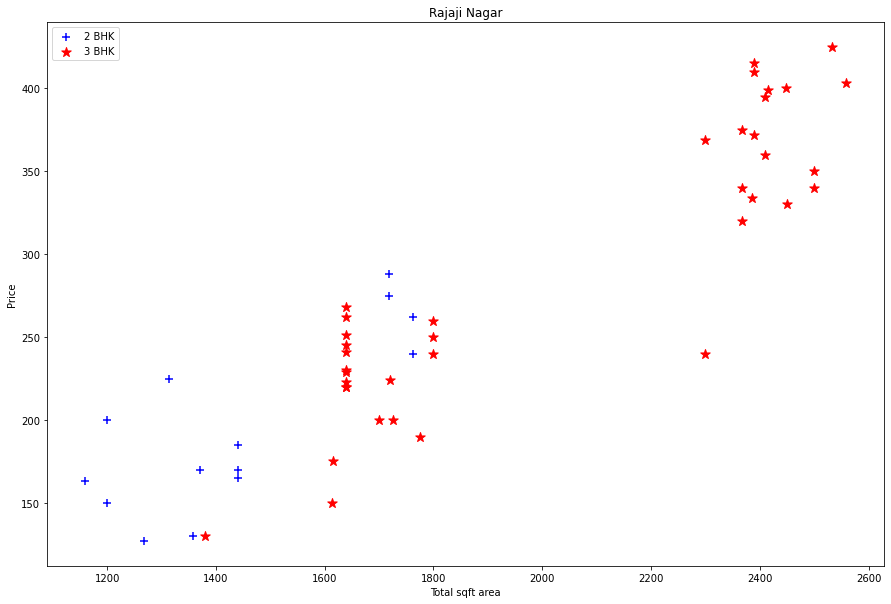

In [67]:
plot_scatter_chart(df7,"Rajaji Nagar")

We can see above around 1800 sqft we have some data where 2bhk prices are more then 3bhk prices at same location Rajaji Nagar , so we have to remove outliers like this.

For a paricular location we will find mean price of 2bhk , 3bh ...
and now when any 3bhk flat has price less then mean price of 2bhk we will remove it

In [68]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={} #Dictionary
        for bhk,bhk_df in location_df.groupby('bhk'):  #Storing in dictionay data of different bhk flat at same location
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [69]:
df8=remove_bhk_outliers(df7)

In [70]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


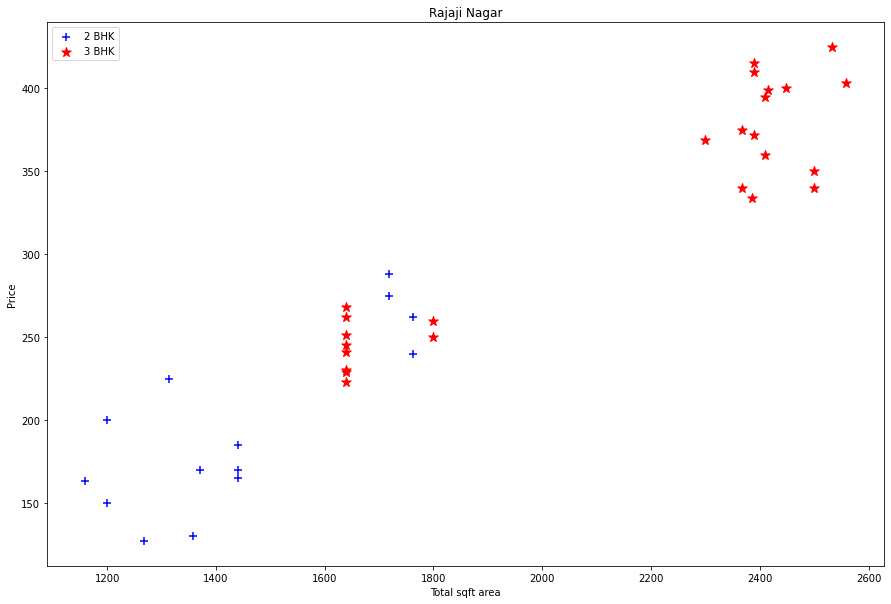

In [71]:
plot_scatter_chart(df8,"Rajaji Nagar")

We will plot Histogram to see no of house we have for a particular price per sqft

In [72]:
import matplotlib

Text(0, 0.5, 'Count')

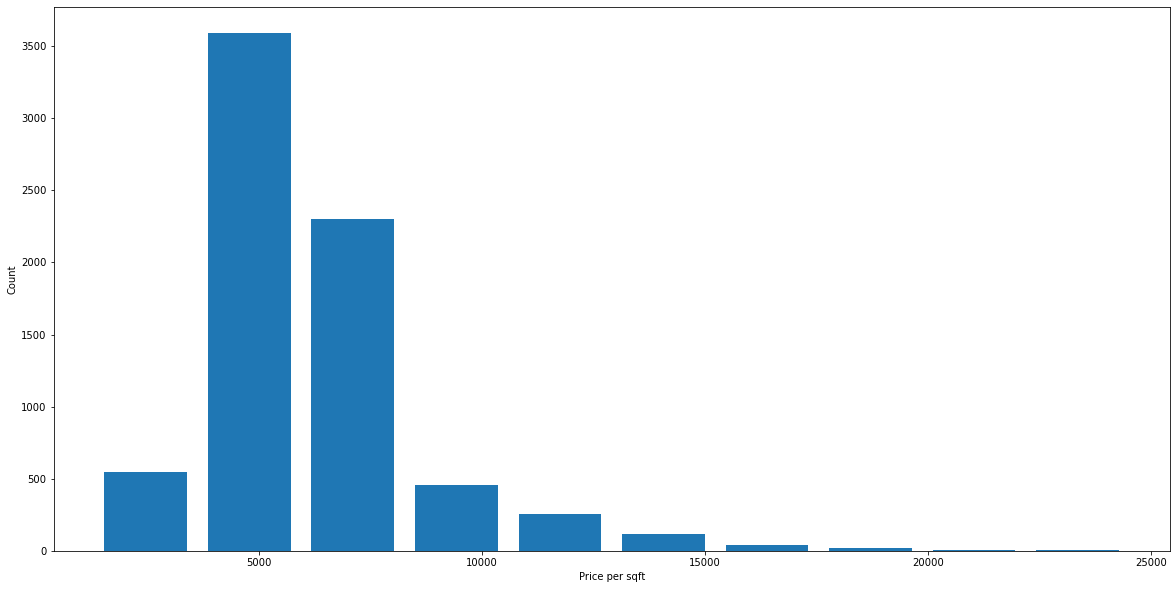

In [73]:
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

Price have normal distrubition

Now we will explore Bathroom 

In [74]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

16 bathrooms and 13 bathrooms like data are outliers

In [75]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


But here if bathroom =16 then room =16 and total_sqft is also very high so these are okay

Text(0, 0.5, 'No of houses')

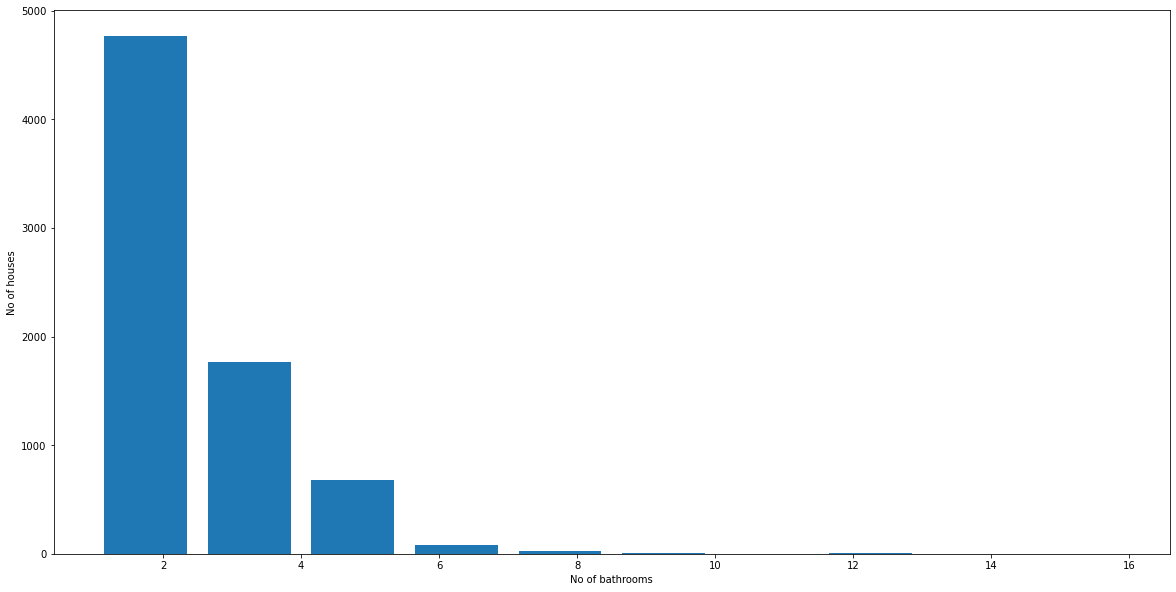

In [76]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("No of bathrooms")
plt.ylabel("No of houses")

we will remove those cases where bathrooms >= (bedrooms+2)

In [77]:
df8[df8.bath>=(df8.bhk+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
530,Arekere,4 BHK,2710.0,6.0,142.0,4,5239.852399
580,BTM 2nd Stage,3 Bedroom,1260.0,5.0,185.0,3,14682.539683
813,Bannerghatta,4 BHK,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...,...
9915,other,4 BHK,6652.0,6.0,510.0,4,7666.867108
10036,other,2 BHK,600.0,4.0,70.0,2,11666.666667
10089,other,3 Bedroom,5656.0,5.0,499.0,3,8822.489392
10202,other,4 BHK,6652.0,6.0,660.0,4,9921.828022


In [78]:
df9=df8[~(df8.bath>=(df8.bhk+2))]

In [79]:
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


Now we will remove columns like size and price_per_sqft

In [80]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')

In [81]:
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


# OneHotEncoding 

In [82]:
dummies=pd.get_dummies(df10.location)

In [83]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
df11=pd.concat([df10,dummies],axis='columns')

In [85]:
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Dummy Variable Trap

In [86]:
df11.drop(['other'],axis='columns',inplace=True)

In [87]:
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df12=df11.drop(['location'],axis='columns')

In [89]:
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training Model

In [90]:
X=df12.drop(['price'],axis='columns')

In [91]:
Y=df12['price']

In [92]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
Y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

# Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr_clf=LinearRegression()

In [98]:
lr_clf.fit(X_train,Y_train)

LinearRegression()

In [99]:
lr_clf.score(X_test,Y_test)

0.8452277697873348

# K Fold cross validation

In [100]:
from sklearn.model_selection import ShuffleSplit

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)

In [103]:
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

# Grid search CV to find best Algorithm

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
from sklearn.linear_model import Lasso

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
def find_best_model_by_grid_search_cv(X,Y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
        
        
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
        'model':algo_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    

In [115]:
find_best_model_by_grid_search_cv(X,Y)

,model,best_score,best_params
0,linear_regression,0.847375,{'normalize': True}
1,lasso,0.712994,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.686339,"{'criterion': 'mse', 'splitter': 'random'}"


In [116]:
#Linear Regression has best score

In [119]:
X.columns #name of all the columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [120]:
np.where(X.columns=='2nd Stage Nagarbhavi')

(array([6], dtype=int64),)

In [121]:
np.where(X.columns=='2nd Stage Nagarbhavi')[0]

array([6], dtype=int64)

In [122]:
np.where(X.columns=='2nd Stage Nagarbhavi')[0][0]

6

In [125]:
np.where(X.columns=='others') #We have removed others columns for dummy variable trap

(array([], dtype=int64),)

In [129]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0] #AS we are giving input as array so output will also come like that so use [0]

In [130]:
predict_price('Vijayanagar',1000,2,2)

array([62.29709375])

In [138]:
predict_price('Vijayanagar',1000,3,3)

array([65.60324093])

# Pickling our Model

In [139]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

While making prediction we are writing X.columns==location , so X is also important and orders in which we are giving input to function are also important so we will import that in jason file and dump

In [140]:
import json
columns={
    'data_columns' : [col.lower() for col in X.columns] #It will be better if everything in lower case
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))